In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannotations.Annotator import Annotator

In [2]:
input_file = 'HepG2_SDOC_active_result.tsv'
infos = pd.read_csv(input_file, sep="\t", header=None)
infos

,0,1,2,3,4,5
0,chr1,2190000,3430000,10,0.437330,0.614114
1,chr1,3430000,5990000,0,1.050111,-0.520215
2,chr1,5990000,6040000,0,0.003852,-0.520215
3,chr1,6040000,6700000,3,0.203751,0.525532
4,chr1,6700000,7660000,0,0.222518,-0.520215
...,...,...,...,...,...,...
2637,chr9,136730000,136790000,0,0.006576,-0.520215
2638,chr9,136790000,136940000,34,0.024912,2.321254
2639,chr9,136940000,137120000,0,0.046040,-0.520215
2640,chr9,137120000,137280000,0,0.032555,-0.520215


In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

figure_size = dict(
    ultra=45,
    large=35,
    middle=20,
    small=10,
    very_small=5
)

def set_plt(figsize=(10, 10)):
    params = {'axes.titlesize': figure_size['ultra'],
              'legend.fontsize': figure_size['middle'],
              'figure.figsize': figsize,
              'axes.labelsize': figure_size['ultra'],
              'xtick.labelsize': figure_size['ultra'],
              'ytick.labelsize': figure_size['ultra'],
              'figure.titlesize': figure_size['ultra'],
              'lines.linewidth': figure_size['very_small']}
    plt.rcParams.update(params)

    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)

def set_Border(axes):
    axes.spines['top'].set_color('none')
    axes.spines['right'].set_color('none')
    axes.spines['bottom'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_linewidth(figure_size['very_small'])
    axes.spines['left'].set_linewidth(figure_size['very_small'])
    axes.tick_params(axis='both', width=figure_size['very_small'], length=figure_size['small'])

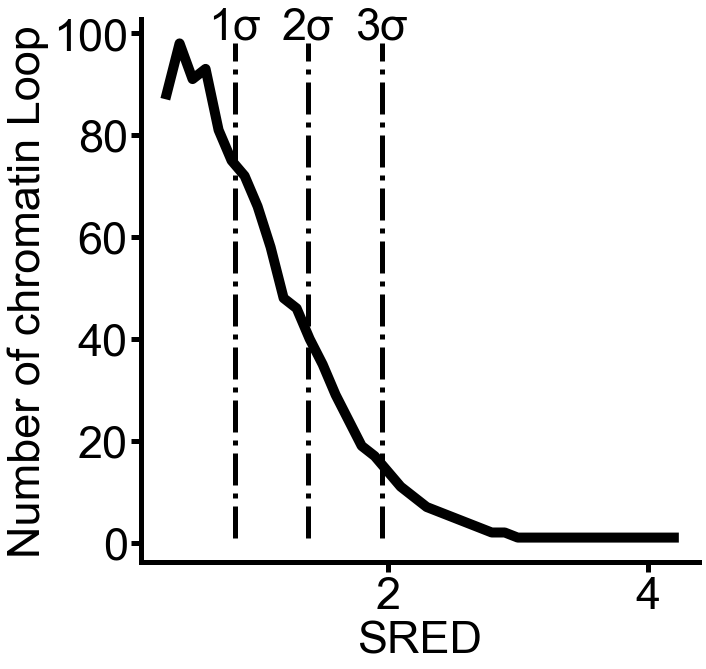

In [4]:
result = infos.loc[infos[3]>0].loc[:,5].round(1).value_counts().sort_index()
x = result.index.tolist()
y = result.values.tolist()

_sigma = infos.loc[infos[3]>0].loc[:,5].std()
_min = infos.loc[infos[3]>0].loc[:,5].min()
_thresholds = [_min+i*_sigma for i in range(1, 4)]

set_plt()
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
axes.grid(False)
axes.plot(x, y, color='black', linewidth=figure_size['small'])
for i in range(3):
    axes.vlines(
        _thresholds[i], result.values.min(), result.values.max(),
        colors='black', linestyles='dashdot'
    )
    axes.text(
        _thresholds[i], result.values.max()+1, '{}σ'.format(i+1),
        fontsize=figure_size['ultra'], horizontalalignment='center'
    )

set_Border(axes)
plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])

plt.xlabel('SRED')
plt.ylabel('Number of chromatin Loop')
# plt.title('Distribution')
plt.savefig('figure_file/SRED Distribution(active).pdf', format='pdf', bbox_inches='tight')
plt.show()

In [5]:
Homo_sapiens_GRCh38_file = '/data1/lmh_data/MINE/source/Homo_sapiens.GRCh38.84.gtf'
Homo_sapiens_GRCh38 = dict()
with open(Homo_sapiens_GRCh38_file, 'r')as f:
    for line in f:
        datas = line.strip().split()
        if len(datas) < 4:
            continue
        if datas[2] != "gene":
            continue
        gene_id = datas[9].split('"')[1]
        Homo_sapiens_GRCh38[gene_id] = [datas[0], int(datas[3]), int(datas[4])]

RNA_seq_file = '/data1/lmh_data/MINE/source/HepG2/RNA_seq_rpkms.xls'
rna_infos = pd.read_excel(RNA_seq_file)
rna_infos["rna_rpkms_avg"] = rna_infos[["SS_FSU_43_none_RNAseq", "SS_FSU_44_none_RNAseq"]].mean(axis=1)
rna_infos = rna_infos.loc[rna_infos["rna_rpkms_avg"]>0]
rna_infos.insert(rna_infos.shape[1], 'Chromosome', '')
rna_infos.insert(rna_infos.shape[1], 'Gene start (bp)', 0)
rna_infos.insert(rna_infos.shape[1], 'Gene end (bp)', 0)
for index in rna_infos.index:
    if rna_infos.loc[index]["Geneid"] not in Homo_sapiens_GRCh38.keys():
        continue
    data = Homo_sapiens_GRCh38[rna_infos.loc[index]["Geneid"]]
    rna_infos.loc[index, "Chromosome"] = data[0]
    rna_infos.loc[index, "Gene start (bp)"] = data[1]
    rna_infos.loc[index, "Gene end (bp)"] = data[2]
rna_infos

,Geneid,SS_FSU_39_none_RNAseq,SS_FSU_40_none_RNAseq,SS_FSU_41_none_RNAseq,SS_FSU_42_none_RNAseq,SS_FSU_43_none_RNAseq,SS_FSU_44_none_RNAseq,SS_FSU_45_none_RNAseq,SS_FSU_46_none_RNAseq,rna_rpkms_avg,Chromosome,Gene start (bp),Gene end (bp)
2,ENSG00000278267,0.000,0.000,0.000,0.000,2.881,8.668,1.957,3.044,5.7745,1,17369,17436
9,ENSG00000238009,0.000,0.000,0.000,0.000,0.049,0.010,0.029,0.010,0.0295,1,89295,133723
12,ENSG00000268903,0.000,0.000,0.000,0.000,0.228,0.536,0.753,0.290,0.3820,1,135141,135895
13,ENSG00000269981,0.000,0.000,0.000,0.000,0.729,0.728,1.070,0.770,0.7285,1,137682,137965
15,ENSG00000241860,0.000,0.000,0.000,0.000,0.104,0.093,0.058,0.039,0.0985,1,141474,173862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60573,ENSG00000276112,0.000,0.000,0.000,0.000,3.858,3.473,0.606,1.648,3.6655,KI270733.1,124758,124937
60582,ENSG00000275104,158.948,186.994,178.420,145.462,1.756,1.696,0.544,2.084,1.7260,KI270733.1,169844,170023
60595,ENSG00000273748,0.000,0.000,0.000,0.000,0.492,0.176,0.432,0.715,0.3340,GL000219.1,54224,83311
60633,ENSG00000278384,0.000,0.000,0.000,0.000,1.111,0.911,0.853,1.156,1.0110,GL000218.1,51867,54893


In [6]:
# infos.insert(infos.shape[1], 'RNA_rpkms', 0)
for index in infos.index:
    _chr, _start, _end = infos.loc[index][0], infos.loc[index][1], infos.loc[index][2]
    temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
    temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
    result = temp[["rna_rpkms_avg"]].mean()
    infos.loc[index, "RNA_rpkms"] = math.log(result["rna_rpkms_avg"], 2)


In [7]:
colors = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]
my_pal = {"low": colors[0], "middle": colors[1], "high": colors[2], "ultra high": colors[3]}

low vs. middle: Mann-Whitney-Wilcoxon test two-sided, P_val:5.241e-06 U_stat=6.446e+04
middle vs. high: Mann-Whitney-Wilcoxon test two-sided, P_val:2.222e-01 U_stat=1.948e+04
high vs. ultra high: Mann-Whitney-Wilcoxon test two-sided, P_val:5.860e-01 U_stat=4.392e+03


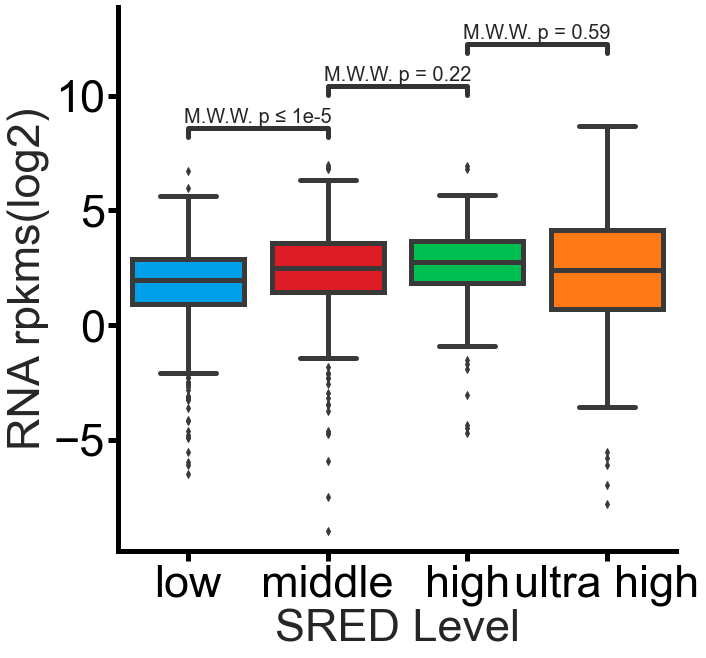

In [8]:
low = infos.loc[infos[3]>0].loc[infos[5]<_thresholds[0]].copy()
middle = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[0]].loc[infos[5]<_thresholds[1]].copy()
high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[1]].loc[infos[5]<_thresholds[2]].copy()
ultra_high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[2]].copy()

low["degree"] = "low"
middle["degree"] = "middle"
high["degree"] = "high"
ultra_high["degree"] = "ultra high"

df = pd.concat([low, middle, high, ultra_high])

set_plt()
sns.set_theme(style="whitegrid")

x = "degree"
y = "RNA_rpkms"
ax = sns.boxplot(x=x, y=y, data=df, palette=my_pal, saturation=1, linewidth=figure_size['very_small'])

pairs=[("low", "middle"), ("middle", "high"), ("high", "ultra high")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y)
annotator.configure(
    test='Mann-Whitney', text_format='simple', line_width=figure_size['very_small'], fontsize=figure_size['middle'])
annotator.apply_and_annotate()

sns.despine()
set_Border(plt.gca())
plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
# plt.xticks(rotation=5)
plt.grid(False)

plt.xlabel("SRED Level", fontsize=figure_size['ultra'])
plt.ylabel("RNA rpkms(log2)", fontsize=figure_size['ultra'])
# plt.title('gene expression in active region', fontsize=figure_size['ultra'])

plt.savefig('figure_file/The relationship between RNA and SRED(active).pdf', format='pdf', bbox_inches='tight')
plt.show()

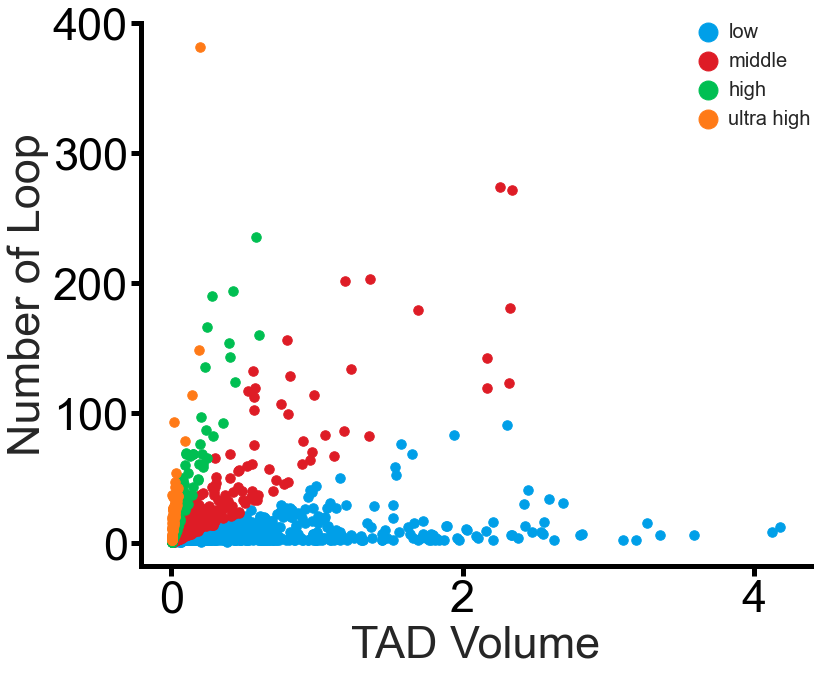

In [9]:
low["TAD Volume"] = low.loc[:, 4]
middle["TAD Volume"] = middle.loc[:, 4]
high["TAD Volume"] = high.loc[:, 4]
ultra_high["TAD Volume"] = ultra_high.loc[:, 4]

low["loop nums"] = low.loc[:, 3]
middle["loop nums"] = middle.loc[:, 3]
high["loop nums"] = high.loc[:, 3]
ultra_high["loop nums"] = ultra_high.loc[:, 3]

pd.concat([low, middle, high, ultra_high]).to_csv('temp/active_SDRCI.csv')

set_plt(figsize=(12, 10))
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
axes.grid(False)

axes = low.plot.scatter(
    x='TAD Volume', y='loop nums', s=2*figure_size['ultra'], color=my_pal["low"], label='low', ax=axes)
axes = middle.plot.scatter(
    x='TAD Volume', y='loop nums', s=2*figure_size['ultra'], color=my_pal["middle"], label='middle', ax=axes)
axes = high.plot.scatter(
    x='TAD Volume', y='loop nums', s=2*figure_size['ultra'], color=my_pal["high"], label='high', ax=axes)
axes = ultra_high.plot.scatter(
    x='TAD Volume', y='loop nums', s=2*figure_size['ultra'], color=my_pal["ultra high"],
    label='ultra high', ax=axes
)

set_Border(axes)
plt.tick_params(colors='black', bottom=True, left=True)
plt.legend(frameon=False, markerscale=2, handletextpad=0, borderpad=0, borderaxespad=0)
plt.grid(False)

plt.xlabel('TAD Volume')
plt.ylabel('Number of Loop')
plt.savefig('figure_file/The relationship between TAD&Loops&SRED(active).pdf', format='pdf', bbox_inches='tight')
plt.show()

In [10]:
Gene_table = pd.read_csv("/data1/lmh_data/MINE/source/Gene_table_20211231.txt", sep="\t")

/home/lmh/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
_mean = ultra_high[["RNA_rpkms"]].mean()["RNA_rpkms"]
low_rpkms = ultra_high.loc[ultra_high["RNA_rpkms"]<=_mean].copy()
for index in low_rpkms.index:
    _chr, _start, _end = low_rpkms.loc[index][0], low_rpkms.loc[index][1], low_rpkms.loc[index][2]
    temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
    temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
    geneids = temp["Geneid"].tolist()
    gene_names = set()
    for gene_id in geneids:
        gene_names = gene_names | set(Gene_table.loc[Gene_table["Gene stable ID"]==gene_id]["Gene name"].tolist())
    gene_names -= {np.nan}
    low_rpkms.loc[index, "Gene names"] = ','.join(list(gene_names))
# low_rpkms.to_csv('temp/active_ultra_high(low_rpkms).csv')
low_rpkms

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,Gene names
147,chr1,143690000,147250000,381,0.196909,2.559569,1.268978,ultra high,0.196909,381,"ANKRD35,NBPF25P,RBM8A,PEX11B,ITGA10,PDZK1,TXNI..."
549,chr12,9060000,9110000,5,0.006389,1.981580,-2.790859,ultra high,0.006389,5,A2M-AS1
678,chr12,130750000,130820000,14,0.018466,1.959381,-5.539520,ultra high,0.018466,14,
797,chr14,75310000,75660000,24,0.026085,2.065436,-1.267080,ultra high,0.026085,24,"JDP2,BATF,JDP2-AS1"
802,chr14,76870000,77140000,23,0.016017,2.338739,1.179670,ultra high,0.016017,23,"RPL22P2,IRF2BPL,LINC02288,CIPC"
963,chr16,30660000,30700000,2,0.001783,2.153072,0.625270,ultra high,0.001783,2,
1369,chr2,73170000,73220000,4,0.002087,2.535649,-6.965784,ultra high,0.002087,4,NOTO
1371,chr2,74690000,74890000,15,0.017014,2.042641,0.502331,ultra high,0.017014,15,HK2-DT
1377,chr2,88560000,88690000,35,0.008932,3.101486,-3.351074,ultra high,0.008932,35,EIF2AK3-DT
1392,chr2,111120000,112120000,114,0.141642,2.012632,0.930787,ultra high,0.141642,114,"SOCAR,SLC30A6P1,EEF1E1P1,TMEM87B,CENPNP2,ANAPC..."


In [12]:
def find_special_tad(df):
    df = df.copy()
    df["score"] = df["TAD Volume"] * df["loop nums"]
    _special = df.sort_values(by="score", ascending=False)[:5].copy()
    for index in _special.index:
        _chr, _start, _end = _special.loc[index][0], _special.loc[index][1], _special.loc[index][2]
        temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
        temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
        geneids = temp["Geneid"].tolist()
        gene_names = set()
        for gene_id in geneids:
            gene_names = gene_names | set(Gene_table.loc[Gene_table["Gene stable ID"]==gene_id]["Gene name"].tolist())
        gene_names -= {np.nan}
        _special.loc[index, "Gene names"] = ','.join(list(gene_names))
    return _special

In [13]:
# find_special_tad(small).to_csv('temp/active_small(special).csv')
find_special_tad(low)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
2339,chr7,121320000,128890000,91,2.306195,0.763548,2.603643,low,2.306195,91,209.863725,"HILPDA,AASS,IMPDH1,IQUB,PRRT4,METTL2B,ARF5,CAL..."
660,chr12,109390000,113100000,83,1.939004,0.793790,2.858114,low,1.939004,83,160.937317,"RPL29P25,IFT81,GPN3,FAM222A-AS1,GLTP,ATXN2,ALD..."
2130,chr6,42900000,47790000,76,1.578383,0.823468,4.971112,low,1.578383,76,119.957109,"YIPF3,TTBK1,POLR1C,DNPH1,GNMT,CDC5L,SRF,MEP1A,..."
596,chr12,48640000,50500000,68,1.651154,0.780923,2.997480,low,1.651154,68,112.278500,"TUBA1A,KMT2D,DDN,ASIC1,FMNL3,LIMA1,FAM186A,FKB..."
1372,chr2,74890000,85060000,41,2.448587,0.550086,3.736622,low,2.448587,41,100.392077,"RBM7P1,SUCLG1,TMSB10,RPS2P17,DNAH6,KCMF1,ANKRD..."


In [14]:
# find_special_tad(middle).to_csv('temp/active_middle(special).csv')
find_special_tad(middle)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1727,chr3,43530000,50620000,271,2.339772,1.109888,3.530230,middle,2.339772,271,634.078327,"SHISA5,IMPDH2,PTPN23-DT,WDR6,TRAIP,USP19,DALRD..."
473,chr11,64160000,69100000,274,2.259033,1.128672,3.418018,middle,2.259033,274,618.974906,"DPP3,RPL37P2,VEGFB,TBC1D10C,SLC25A45,MAP3K11,S..."
672,chr12,120320000,122970000,181,2.322770,0.983454,2.907588,middle,2.322770,181,420.421339,"MLEC,MSI1,ZCCHC8,KDM2B,CABP1,OASL,P2RX4,RNF10,..."
1307,chr2,20650000,27680000,142,2.165051,0.927726,4.517898,middle,2.165051,142,307.437300,"KHK,OTOF,PFN4,LDAH,OST4,ASXL2,DTNB-AS1,SUPT7L,..."
2121,chr6,29630000,34430000,179,1.694772,1.082063,3.953804,middle,1.694772,179,303.364150,"GPSM3,COL11A2,TAPBP,CLIC1,PHF1,CUTA,HSPA1A,RGL..."


In [15]:
# find_special_tad(high).to_csv('temp/active_high(special).csv')
find_special_tad(high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1379,chr2,88740000,98390000,235,0.581795,1.588094,3.389207,high,0.581795,235,136.721719,"CNNM4,ARID5A,ACTR1B,GPAT2,LSP1P4,TMEM131,ANKRD..."
2285,chr7,56370000,67000000,160,0.605054,1.401585,0.987824,high,0.605054,160,96.808621,"HNRNPCP7,GTF2IP23,GTF2IP5,CCT6P3,SNORA22C,YWHA..."
1986,chr5,68280000,71780000,194,0.422430,1.659914,2.575572,high,0.422430,194,81.951366,"MARVELD2,OCLN,MCCC2,SLC30A5,SMN2,SMN1,CCDC125,..."
1375,chr2,85820000,88180000,154,0.392115,1.578359,3.027644,high,0.392115,154,60.385713,"MRPL35,REEP1,RNF103,ANAPC1P4,CHMP3,CD8B,ANAPC1..."
2289,chr7,71730000,73600000,143,0.404488,1.523922,1.908253,high,0.404488,143,57.841782,"TRIM50,GTF2IRD2P1,TRIM74,PHBP5,TYW1B,SPDYE7P,B..."


In [16]:
# find_special_tad(ultra_high).to_csv('temp/active_ultra_high(special).csv')
find_special_tad(ultra_high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
147,chr1,143690000,147250000,381,0.196909,2.559569,1.268978,ultra high,0.196909,381,75.022419,"ANKRD35,NBPF25P,RBM8A,PEX11B,ITGA10,PDZK1,TXNI..."
1511,chr20,25400000,31510000,148,0.189106,1.988085,1.570021,ultra high,0.189106,148,27.987744,"FAM182A,VN1R108P,FRG1DP,DUX4L37,ANKRD20A21P,GI..."
1392,chr2,111120000,112120000,114,0.141642,2.012632,0.930787,ultra high,0.141642,114,16.147175,"SOCAR,SLC30A6P1,EEF1E1P1,TMEM87B,CENPNP2,ANAPC..."
2321,chr7,102280000,103070000,78,0.096117,2.020719,0.740439,ultra high,0.096117,78,7.497133,"LRWD1,LRRC17,SH2B2,RASA4B,SPDYE2,FAM185A,ALKBH..."
1363,chr2,69910000,70300000,42,0.046309,2.060623,4.387788,ultra high,0.046309,42,1.944969,"PCBP1-AS1,PCBP1,C2orf42,TIA1,ASPRV1,LINC01816,..."


In [17]:
infos

,0,1,2,3,4,5,RNA_rpkms
0,chr1,2190000,3430000,10,0.437330,0.614114,1.655917
1,chr1,3430000,5990000,0,1.050111,-0.520215,2.047676
2,chr1,5990000,6040000,0,0.003852,-0.520215,NaN
3,chr1,6040000,6700000,3,0.203751,0.525532,2.934012
4,chr1,6700000,7660000,0,0.222518,-0.520215,-1.286304
...,...,...,...,...,...,...,...
2637,chr9,136730000,136790000,0,0.006576,-0.520215,3.998587
2638,chr9,136790000,136940000,34,0.024912,2.321254,3.912968
2639,chr9,136940000,137120000,0,0.046040,-0.520215,3.073610
2640,chr9,137120000,137280000,0,0.032555,-0.520215,4.708867


In [18]:
# _boundaries = infos.loc[infos[3]>0].loc[:,5].median()
# print('SRED mean: {}'.format(_boundaries))
# _boundaries = 0.6

scores = [0, 0, 0, 0]
RBM25_chipseq_file_path = '/data1/lmh_data/MINE/source/HepG2/GSM3393550_RBM25_ChIP_HepG2_OPTIMAL_ppr.IDR0.02.filt.narrowPeak'
with open(RBM25_chipseq_file_path, 'r')as f:
    for line in f:
        datas = line.strip().split()
        _chrom, _start, _end = datas[0], datas[1], datas[2]
        _tad = infos.loc[infos[3]>0].loc[infos[0]==_chrom].loc[infos[1]<=int(_start)].loc[infos[2]>=int(_end)]
        if _tad.loc[:,5].mean() > 0 and _tad.loc[:,5].mean() < _thresholds[0]:
            scores[0] += 1/_tad.loc[:,4].mean()
        elif _tad.loc[:,5].mean() > _thresholds[0] and _tad.loc[:,5].mean() < _thresholds[1]:
            scores[1] += 1/_tad.loc[:,4].mean()
        elif _tad.loc[:,5].mean() > _thresholds[1] and _tad.loc[:,5].mean() < _thresholds[2]:
            scores[2] += 1/_tad.loc[:,4].mean()
        elif _tad.loc[:,5].mean() > _thresholds[2]:
            scores[3] += 1/_tad.loc[:,4].mean()

print(scores)


[34481.47956084955, 60990.96352861022, 45093.970507032354, 33943.674641938975]


In [19]:
_thresholds

[0.8252086838023407, 1.3890959223266224, 1.952983160850904]

In [20]:
rna_infos.loc[rna_infos['Geneid']=='ENSG00000100811']

,Geneid,SS_FSU_39_none_RNAseq,SS_FSU_40_none_RNAseq,SS_FSU_41_none_RNAseq,SS_FSU_42_none_RNAseq,SS_FSU_43_none_RNAseq,SS_FSU_44_none_RNAseq,SS_FSU_45_none_RNAseq,SS_FSU_46_none_RNAseq,rna_rpkms_avg,Chromosome,Gene start (bp),Gene end (bp)
43557,ENSG00000100811,0.0,0.0,0.007,0.0,9.797,9.874,14.349,12.131,9.8355,14,100238298,100282792


In [21]:
infos.loc[infos[3]>0].loc[infos[0]=='chr14'].loc[infos[1]<=100238298].loc[infos[2]>=100282792]

,0,1,2,3,4,5,RNA_rpkms
817,chr14,99970000,100380000,11,0.03401,1.485,1.993516


In [22]:
RBM25_chipseq_file_path = '/data1/lmh_data/MINE/source/HepG2/GSM3393550_RBM25_ChIP_HepG2_OPTIMAL_ppr.IDR0.02.filt.narrowPeak'
with open(RBM25_chipseq_file_path, 'r')as f:
    for line in f:
        datas = line.strip().split()
        _chrom, _start, _end = datas[0], datas[1], datas[2]
        if _chrom == 'chr14' and int(_start) > 99970000 and int(_end) < 100380000:
            print(datas)

['chr14', '100030761', '100031197', '.', '862', '.', '12.87359', '-1.00000', '4.82926', '218']
['chr14', '100091211', '100091647', '.', '780', '.', '13.96519', '-1.00000', '4.79123', '218']
['chr14', '100043354', '100043790', '.', '970', '.', '15.55237', '-1.00000', '4.74020', '218']
['chr14', '100204717', '100205153', '.', '806', '.', '25.85894', '-1.00000', '5.19163', '218']
['chr14', '100010000', '100010436', '.', '812', '.', '26.74194', '-1.00000', '5.19163', '218']
['chr14', '100009684', '100010120', '.', '813', '.', '27.14667', '-1.00000', '5.19163', '218']
['chr14', '99988765', '99989201', '.', '744', '.', '28.14454', '-1.00000', '5.19163', '218']
['chr14', '100041979', '100042415', '.', '835', '.', '29.35601', '-1.00000', '5.19163', '218']
['chr14', '100075562', '100075998', '.', '839', '.', '29.42177', '-1.00000', '5.19163', '218']
['chr14', '100040712', '100041148', '.', '763', '.', '31.55914', '-1.00000', '5.19163', '218']
['chr14', '100043650', '100044086', '.', '732', '.',